# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified yoru best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasds around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.


# Good Luck

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [18]:
import seaborn as sns

In [19]:
import pandas as pd
df = pd.read_csv('movie_train.csv')
df.head()

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


### Task #2: Check for missing values:

In [20]:
# Check for NaN values:
df.isna().sum()


Unnamed: 0        0
Release Year      0
Title             0
Plot              0
Director          0
Cast            169
Genre             0
dtype: int64

In [21]:
df.loc[df.Cast.isna()]

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
21,22523,2004,Kekexili: Mountain Patrol,The film opens with the summary execution of a...,Lu Chuan,NaN,drama
261,34135,2007,Dead Daughters,"In present-day Moscow, a woman Vera (Daria Cha...",Pavel Ruminov,NaN,horror
494,12958,1997,Defying Gravity,"John ""Griff"" Griffith, an average college stud...",John Keitel,NaN,drama
498,12937,1997,Cannibal Rollerbabes,When Scott is fired from Local Diner because h...,Unknown,NaN,horror
521,22329,2013,Stay,"The movie Stay, based on the novel by Aislinn ...",Wiebke von Carolsfeld,NaN,drama
533,22519,2004,Green Hat,Wang Yao (Liao Fan) is a criminal. Along with ...,Liu Fendou,NaN,drama
576,34294,1947,Arirang,Yeong-jin is a student who has become mentally...,Na Woon-gyu,NaN,drama
591,34304,1947,A Ferry Boat that Has No Owner,"The plot concerns Soo-sam, a farmer who goes t...",Lee Gyu-hwan,NaN,drama
663,23910,1966,Nayak,"A famous star of Bengali films, Arindam Mukher...",Satyajit Ray,NaN,drama
702,34134,2007,Cargo 200,"Artemy (Leonid Gromov), professor of Scientifi...",Aleksei Balabanov,NaN,thriller


In [22]:
# Check for whitespace strings (it's OK if there aren't any!):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 7 columns):
Unnamed: 0      10682 non-null int64
Release Year    10682 non-null int64
Title           10682 non-null object
Plot            10682 non-null object
Director        10682 non-null object
Cast            10513 non-null object
Genre           10682 non-null object
dtypes: int64(2), object(5)
memory usage: 584.2+ KB


In [23]:
df.columns

Index(['Unnamed: 0', 'Release Year', 'Title', 'Plot', 'Director', 'Cast',
       'Genre'],
      dtype='object')

In [24]:
for col in df.columns[2:]:
    print(df[col].str.isspace().sum())
#     print(col)


0
0
0
0
0


### Task #3: Remove NaN values:

In [25]:
df.dropna(inplace=True)

### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Unnamed: 0','Genre'])
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
genres = y.unique()

In [29]:
genres

array(['horror', 'drama', 'action', 'western', 'comedy', 'romance',
       'thriller', 'crime', 'adventure'], dtype=object)

In [30]:
X.head()

,Release Year,Title,Plot,Director,Cast
0,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors"
1,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett"
2,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier"
3,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi"
4,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara..."


### TF-IDF Tokenizer

In [61]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
# parser = English()
# parser = nlp(disable=['parser', 'ner'])

import re 

# Creating our tokenizer function
def spacy_tokenizer(text):
    # remove html tags from all of the text before processing
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    # Creating our token object, which is used to create documents with linguistic annotations.
    # we disabled the parser and ner parts of the pipeline in order to speed up parsing
    mytokens = nlp(cleantext, disable=['parser', 'ner'])

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [63]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, max_features=1000, min_df=5, max_df=0.7)

In [69]:
features = tfidf_vector.fit_transform(X_train['Plot']).toarray()
labels = df.Genre
features.shape

(8410, 1000)

In [68]:
tfidf_vector.get_feature_names()

['abandon',
 'able',
 'accept',
 'accident',
 'accidentally',
 'accompany',
 'accuse',
 'act',
 'action',
 'actor',
 'actually',
 'adam',
 'admit',
 'adopt',
 'advice',
 'affair',
 'age',
 'agent',
 'ago',
 'agree',
 'aid',
 'air',
 'airport',
 'alan',
 'alex',
 'alice',
 'alive',
 'allow',
 'america',
 'american',
 'amy',
 'andrew',
 'andy',
 'angel',
 'angela',
 'angeles',
 'anger',
 'angry',
 'ann',
 'anna',
 'anne',
 'annie',
 'announce',
 'answer',
 'apartment',
 'apologize',
 'apparently',
 'appear',
 'approach',
 'area',
 'argue',
 'argument',
 'arjun',
 'arm',
 'army',
 'arrange',
 'arrest',
 'arrival',
 'arrive',
 'art',
 'arthur',
 'artist',
 'ask',
 'assault',
 'assign',
 'assistant',
 'assume',
 'attack',
 'attempt',
 'attend',
 'attention',
 'attract',
 'audience',
 'aunt',
 'authority',
 'avoid',
 'awaken',
 'away',
 'baby',
 'bad',
 'bag',
 'ball',
 'band',
 'bank',
 'bar',
 'barbara',
 'base',
 'battle',
 'beach',
 'bear',
 'beat',
 'beautiful',
 'bed',
 'bedroom',
 'be

### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x1a1d59e0d0>,
                vocabulary=None)

In [34]:
# from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline(steps=[('count', CountVectorizer()), ('nb', MultinomialNB())])


### Using Smote for class Imbalence

In [12]:
df['Genre'].value_counts()

drama        3673
comedy       2703
action        823
horror        810
thriller      680
romance       644
western       525
adventure     329
crime         326
Name: Genre, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Unnamed: 0','Genre'])
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train

,Release Year,Title,Plot,Director,Cast
3943,1941,Cadet Girl,A West Point cadet falls in love with a girl w...,Ray McCarey,"Carole Landis, George Montgomery"
5351,1963,Gunfight at Comanche Creek,A gang of Colorado bank robbers led by Amos Tr...,Frank McDonald,"Audie Murphy, Colleen Miller"
8403,1950,The Second Face,Claire Elwood runs to her car and speeds away....,Jack Bernhard,"Ella Raines, Rita Johnson"
9193,1980,Hussy,Beaty (Mirren) is a prostitute working at a Lo...,Matthew Chapman,"Helen Mirren, John Shea"
7989,1993,Demolition Man,"In 1996, psychopathic career criminal Simon Ph...",Marco Brambilla,"Sylvester Stallone, Wesley Snipes, Sandra Bull..."
6694,1997,Below Utopia,Daniel returns to his family's mansion for the...,Kurt Voss,"Alyssa Milano, Ice-T"
7010,1987,The Principal,Rick Latimer (Jim Belushi) is a high-school te...,Christopher Cain,"James Belushi, Louis Gossett, Jr., Rae Dawn Chong"
4900,1948,The Amazing Mr. X,"Two years after her husband's death, Christine...",Bernard Vorhaus,"Turhan Bey, Lynn Bari, Cathy O'Donnell"
625,2009,Lymelife,"Set in 1979 Syosset, Long Island, New York, Ly...",Derick Martini,"Alec Baldwin, Emma Roberts, Rory Culkin, Kiera..."
6488,1965,Curse of Simba,When white hunter Mike Stacey kills a lion in ...,Lindsay Shonteff,"Bryant Haliday, Dennis Price"


In [37]:
cv = CountVectorizer(tokenizer=spacy_tokenizer, max_df=0.90, min_df=10, stop_words='english', ngram_range=(1,3))

In [58]:
# df['num_legs'].sample(n=3, random_state=1)

dtm = cv.fit_transform(X_train['Plot'].sample(n=100, random_state=1))

In [56]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 2, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [60]:
# Previous original class distribution
print('Original class distribution: \n')
print(df['Genre'].value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit(dtm, y_train.sample(n=100, random_state=1)) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

drama        3673
comedy       2703
action        823
horror        810
thriller      680
romance       644
western       525
adventure     329
crime         326
Name: Genre, dtype: int64


TypeError: cannot unpack non-iterable SMOTE object

### Feature Union

In [53]:
from sklearn.pipeline import FeatureUnionb

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [34]:
# Form a prediction set
pipe.fit(X_train['Plot'], y_train)
labels = pipe.predict(X_test['Plot'])

Text(91.68, 0.5, 'predicted label')

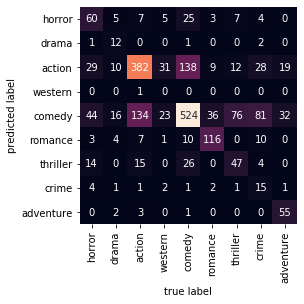

In [41]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [44]:
# Print a classification report
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

      action       0.52      0.39      0.44       155
   adventure       0.75      0.24      0.36        50
      comedy       0.58      0.69      0.63       550
       crime       0.00      0.00      0.00        62
       drama       0.54      0.72      0.62       726
      horror       0.77      0.70      0.73       166
     romance       0.44      0.33      0.38       143
    thriller       0.54      0.10      0.17       144
     western       0.90      0.51      0.65       107

    accuracy                           0.58      2103
   macro avg       0.56      0.41      0.44      2103
weighted avg       0.57      0.58      0.55      2103



In [45]:
# Print the overall accuracy and F1 score



### Use Gridsearch to optimize

In [54]:
from sklearn.model_selection import GridSearchCV
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'count__max_df': [ 0.6,0.7,0.8,0.9],
    'count__min_df': [2,3,4,5,10],
    'count__stop_words': ['english', None]
}


In [56]:
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, verbose=1, n_jobs=-1)
search.fit(X_train['Plot'], y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished


Best parameter (CV score=0.579):
{'count__max_df': 0.6, 'count__min_df': 2, 'count__stop_words': None}


In [57]:
#now run prediction with best parameters
labels = search.best_estimator_.predict(X_test['Plot'])

Text(91.68, 0.5, 'predicted label')

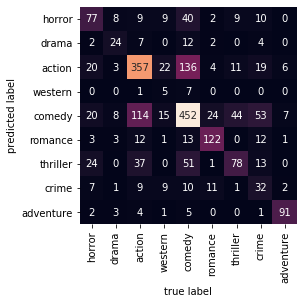

In [58]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [59]:
# Print a classification report
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

      action       0.47      0.50      0.48       155
   adventure       0.47      0.48      0.48        50
      comedy       0.62      0.65      0.63       550
       crime       0.38      0.08      0.13        62
       drama       0.61      0.62      0.62       726
      horror       0.73      0.73      0.73       166
     romance       0.38      0.55      0.45       143
    thriller       0.39      0.22      0.28       144
     western       0.85      0.85      0.85       107

    accuracy                           0.59      2103
   macro avg       0.55      0.52      0.52      2103
weighted avg       0.58      0.59      0.58      2103



### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [46]:
pipe.fit(X['Plot'], y)
# labels = pipe.predict(X['Plot'])

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [47]:
dft = pd.read_csv('movie_test.csv')
dft.head()

,Unnamed: 0,Release Year,Title,Plot,Director,Cast
0,5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord"
1,32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit"
2,7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan"
3,4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph"
4,7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell"


In [48]:
labels_test = pipe.predict(dft['Plot'])

In [52]:
labels_test

array(['drama', 'action', 'western', ..., 'action', 'drama', 'drama'],
      dtype='<U9')

In [68]:
prediction_results = pd.concat([dft['Unnamed: 0'], pd.Series(labels_test)], axis=1)

In [74]:
prediction_results.head()

,Unnamed: 0,0
0,5075,drama
1,32149,action
2,7154,western
3,4259,comedy
4,7548,comedy


In [75]:
prediction_results.set_index(['Unnamed: 0'], inplace=True)

In [83]:
prediction_results.rename(columns={0: 'genre'},inplace=True)

In [85]:
prediction_results.head()

,genre
Unnamed: 0,
5075,drama
32149,action
7154,western
4259,comedy
7548,comedy


In [89]:
prediction_results.shape

(3561, 1)

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

In [88]:
prediction_results.to_csv('finalanswers_GS.csv', header=False)

## Great job!